In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv("epa-sea-level.csv")

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [7]:
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

Text(0, 0.5, 'Sea level (in)')

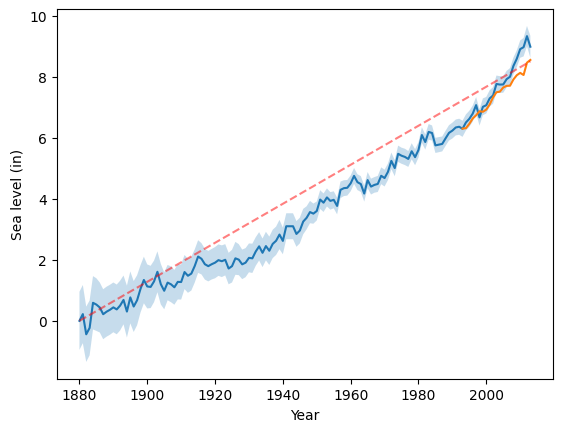

In [6]:
columns = df.columns
plt.plot(df["Year"], df[columns[1]])
plt.fill_between(df["Year"], df[columns[2]], df[columns[3]], alpha=0.25)
plt.plot(df["Year"], df[columns[4]])
plt.plot([1880, 2013], [0, 8.5], color="red", linestyle="dashed", alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Sea level (in)")

#### Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

Text(0, 0.5, 'Sea level (in)')

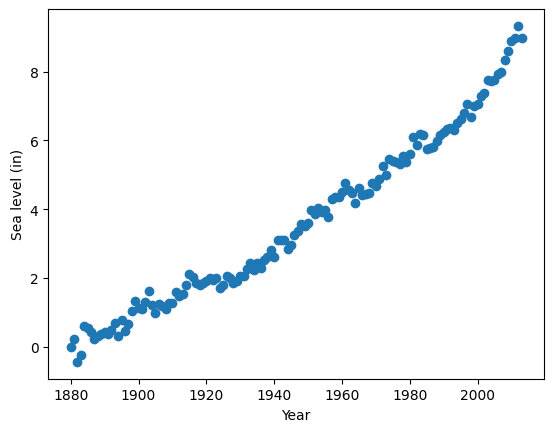

In [8]:
fig, ax = plt.subplots()
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])
ax.set_xlabel("Year")
ax.set_ylabel("Sea level (in)")

#### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [9]:
result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

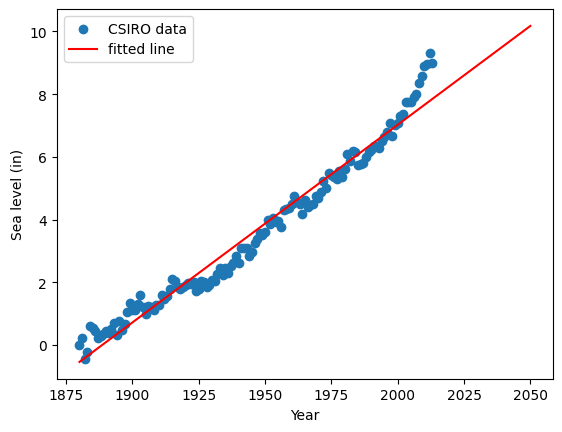

In [10]:
x = range(df["Year"].min(), 2051, 1)

fig, ax = plt.subplots()
ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="CSIRO data")
ax.plot(x, result.intercept + result.slope*x, 'r', label="fitted line")
ax.set_xlabel("Year")
ax.set_ylabel("Sea level (in)")
ax.legend()


#### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [12]:
new_df = df[df["Year"] >= 2000]
new_result = linregress(new_df["Year"], new_df["CSIRO Adjusted Sea Level"])

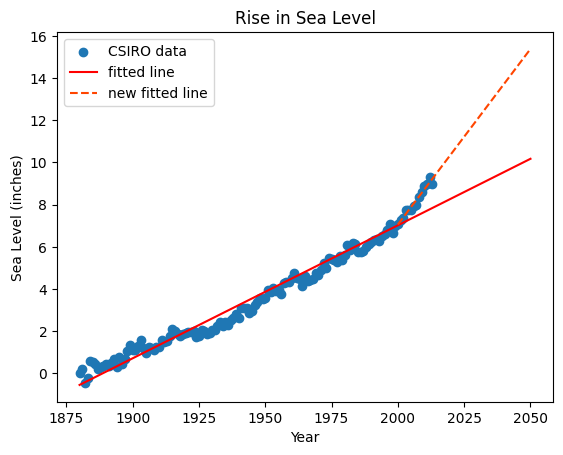

In [16]:
x_new = range(new_df["Year"].min(), 2051, 1)

fig, ax = plt.subplots()
ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="CSIRO data")
ax.plot(x, result.intercept + result.slope*x, 'r',
        label="fitted line")
ax.plot(x_new, new_result.intercept + new_result.slope*x_new,
        color='orangered', linestyle="dashed",
        label="new fitted line")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
ax.legend()

In [18]:
def draw_plot():
    # Read data from file
    df = pd.read_csv("epa-sea-level.csv")

    # Create scatter plot
    fig, ax = plt.subplots()
    ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

    # Create first line of best fit
    result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    x = range(df["Year"].min(), 2051, 1)
    ax.plot(x, result.intercept + result.slope*x,
            color='tab:red', label="fitted line")

    # Create second line of best fit
    new_result = linregress(df["Year"][df["Year"] >= 2000],
                            df["CSIRO Adjusted Sea Level"][df["Year"] >= 2000])
    x_new = range(new_df["Year"].min(), 2051, 1)
    ax.plot(x_new, new_result.intercept + new_result.slope*x_new,
            color='orangered', label="new fitted line")

    # Add labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("Sea Level (inches)")
    ax.set_title("Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    #plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

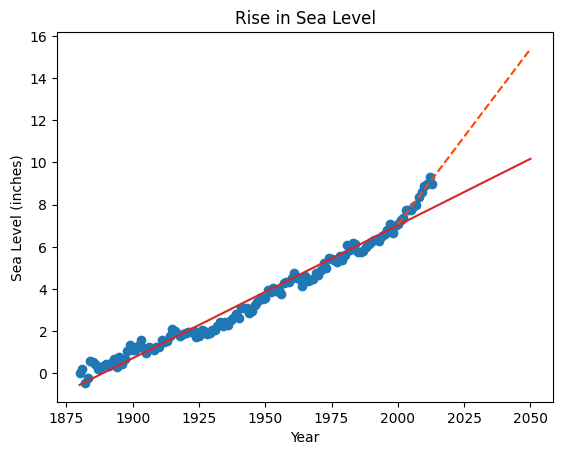

In [19]:
draw_plot()